# Identifiability and Backdoor Criterion

This notebook explores identifiability via the IdentifiabiltyChecker, for the simple triangle graph
with nodes X,Y, Z and arrows X->Y and X<-Z->Y 

In [1]:
# this makes sure it starts looking for things from the JudeasRx folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

/home/rrtucci/PycharmProjects/JudeasRx


In [2]:
from DoX_BayesNet import DoX_BayesNet
import DoX_BayesNet
from graphs.BayesNet import *
from nodes.BayesNode import *
from IdentifiabilityChecker import IdentifiabilityChecker
import IdentifiabilityChecker
import imp
from pprint import pprint
%matplotlib inline

In [3]:
def print_bnet(bnet):
    for nd in bnet.nodes:
        print(nd.name, ", parents=" + str([x.name for x in nd.parents]),
              ", children=" + str([x.name for x in nd.children]))
        print(nd.potential.pot_arr)
        print()

## Building in_bnet

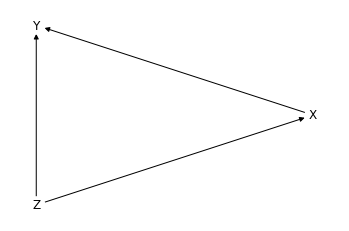

X , parents=['Z'] , children=['Y']
[[0.677 0.323]
 [0.483 0.517]]

Z , parents=[] , children=['X', 'Y']
[0.473 0.527]

Y , parents=['X', 'Z'] , children=[]
[[[0.445 0.555]
  [0.644 0.356]]

 [[0.574 0.426]
  [0.960 0.040]]]



In [4]:
def build_in_bnet(draw=True):
    nd_X = BayesNode(0, name="X")
    nd_Y = BayesNode(1, name="Y")
    nd_Z = BayesNode(2, name="Z")

    nd_Y.add_parents({nd_X, nd_Z})
    nd_X.add_parents({nd_Z})

    nodes = {nd_X, nd_Y, nd_Z}
    in_bnet = BayesNet(nodes)

    # in general
    # DiscreteCondPot(False, [y1, y2, y3, x]) refers to P(x| y1, y2, y3)
    nd_Z.potential = DiscreteUniPot(False, nd_Z)  # P(a)
    nd_X.potential = DiscreteCondPot(False, [nd_Z, nd_X])  # P(b| a)
    nd_Y.potential = DiscreteCondPot(False, [nd_Z, nd_X, nd_Y])
    for nd in nodes:
        nd.potential.set_to_random()
        nd.potential.normalize_self()
    if draw:
        in_bnet.draw(algo_num=1)
    return in_bnet

    
in_bnet = build_in_bnet(True)
print_bnet(in_bnet)

## Building doX bnet

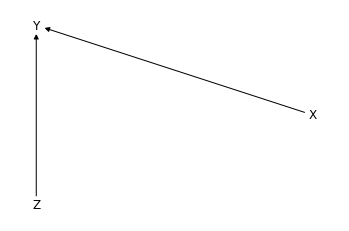

X , parents=[] , children=['Y']
[1.000 0.000]

Z , parents=[] , children=['Y']
[0.473 0.527]

Y , parents=['X', 'Z'] , children=[]
[[[0.445 0.555]
  [0.644 0.356]]

 [[0.574 0.426]
  [0.960 0.040]]]



In [5]:
unobs_nd_list = []
trol_list = []
doX_bnet = DoX_BayesNet.DoX_BayesNet(in_bnet,
                        unobs_nd_list,
                        trol_list,
                        x_val=0)
doX_bnet.draw(algo_num=1)
print_bnet(doX_bnet)

## Node Z is control, no unobserved nodes

In [6]:
nd_Z = in_bnet.get_node_named("Z")
doX_bnet.unobs_nd_list = []
doX_bnet.trol_list = [nd_Z]
checker = IdentifiabilityChecker.IdentifiabilityChecker(doX_bnet,
                          num_1world_samples=50000,
                          num_worlds=3)
checker.set_query_bds()
print("control nodes:",
      [nd.name for nd in checker.trol_list])
pprint(checker.get_query_bds())

world 0
world 1
world 2
control nodes: ['Z']
{(0,): array([0.555, 0.557]), (1,): array([0.423, 0.429])}


## Node Z is unobserved, no control nodes

In [7]:
nd_Z = in_bnet.get_node_named("Z")
doX_bnet.unobs_nd_list = [nd_Z]
doX_bnet.trol_list = []
checker = IdentifiabilityChecker.IdentifiabilityChecker(doX_bnet,
                          num_1world_samples=5000,
                          num_worlds=20)
checker.set_query_bds()
print("control nodes:",
      [nd.name for nd in checker.trol_list])
pprint(checker.get_query_bds())

world 0
world 1
world 2
world 3
world 4
world 5
world 6
world 7
world 8
world 9
world 10
world 11
world 12
world 13
world 14
world 15
world 16
world 17
world 18
world 19
control nodes: []
{(): array([0.430, 0.564])}


## No unobserved or control nodes

In [8]:
doX_bnet.unobs_nd_list = []
doX_bnet.trol_list = []
checker = IdentifiabilityChecker.IdentifiabilityChecker(doX_bnet,
                          num_1world_samples=50000,
                          num_worlds=3)
checker.set_query_bds()
print("control nodes:",
      [nd.name for nd in checker.trol_list])
pprint(checker.get_query_bds())

world 0
world 1
world 2
control nodes: []
{(): array([0.502, 0.507])}
